Copyright @ CUHK Jockey Club AI for the Future Project
## Computer Vision

<a target="_blank" href="https://colab.research.google.com/github/xxcuhk/computer_vision/blob/main/Computer_Vision.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Step 1: Preparation

1. Runtime, Factory reset runtime
2. Runtime, Change runtime type, Hardware accelerator: GPU

## Step 1.1: Import Library

In [ ]:
# Import library

import os # library for interation with operation system, for manipulating folders
import tensorflow as tf # machine learning library
import numpy as np # library for working with arrays
import matplotlib.pyplot as plt # library for plotting figures, pyplot provides MATLAB-like plot

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

import shutil # high-level file operations
import pathlib # object-oriented filesystem paths

import random

In [ ]:
# Setting parameters

IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 50

## Step 1.2: Download Data

In [ ]:
# Download data
# Print directory tree

# tf.keras.utils.get_file: download a file from a URL if it not already in the cache
# origin: original URL of the file
# extract: true tries extracting the file as an Archive, like tar or zip
zip_dir = tf.keras.utils.get_file(origin="https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip", extract=True)

# os.path.dirname(path): return the directory name of pathname path
zip_dir_base = os.path.dirname(zip_dir)

# os.walk(top, topdown=True): get the root, directory, file name in a directory tree by walking the tree
# returns 3-tuple (dirpath, dirnames, filenames)
for root, dirs, files in os.walk(zip_dir_base, topdown=True):
  print(root)

68606236/68606236 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs


In [ ]:
# Print number of files in each folder

# os.path.join: join one or more path components intelligently
base_dir = os.path.join(zip_dir_base, "cats_and_dogs_filtered") # base directory
train_dir = os.path.join(base_dir, "train") # directory with training images
validation_dir = os.path.join(base_dir, "validation") # directory with validation images

train_cats_dir = os.path.join(train_dir, "cats")  # directory with training cat images
train_dogs_dir = os.path.join(train_dir, "dogs")  # directory with training dog images
validation_cats_dir = os.path.join(validation_dir, "cats")  # directory with validation cat images
validation_dogs_dir = os.path.join(validation_dir, "dogs")  # directory with validation dog images

# os.path.isdir: check if path is an existing directory
# os.listdir: return a list containing the names of the entries in the directory given by path
if os.path.isdir(train_cats_dir):
  print("file number in folder:", train_cats_dir, "is: ", len(os.listdir(train_cats_dir)))

if os.path.isdir(train_dogs_dir):
  print("file number in folder:", train_dogs_dir, "is: ", len(os.listdir(train_dogs_dir)))

if os.path.isdir(validation_cats_dir):
  print("file number in folder:", validation_cats_dir, "is: ", len(os.listdir(validation_cats_dir)))

if os.path.isdir(validation_dogs_dir):
  print("file number in folder:", validation_dogs_dir, "is: ", len(os.listdir(validation_dogs_dir)))

file number in folder: /root/.keras/datasets/cats_and_dogs_filtered/train/cats is:  1000
file number in folder: /root/.keras/datasets/cats_and_dogs_filtered/train/dogs is:  1000
file number in folder: /root/.keras/datasets/cats_and_dogs_filtered/validation/cats is:  500
file number in folder: /root/.keras/datasets/cats_and_dogs_filtered/validation/dogs is:  500


In [ ]:
# Create new folders
# Print number of files in the new folders

# os.path.join: join one or more path components intelligently
# os.path.isdir: check if path is an existing directory
# os.mkdir: create a directory named path with numeric mode mode
new_cats_dir = os.path.join(base_dir, "cats") # create new folder for all cat images
if not os.path.isdir(new_cats_dir):
  os.mkdir(new_cats_dir)

new_dogs_dir = os.path.join(base_dir, "dogs") # create new folder for all dog images
if not os.path.isdir(new_dogs_dir):
  os.mkdir(new_dogs_dir)

for root, dirs, files in os.walk(zip_dir_base, topdown=True):
  print(root)

# os.listdir: return a list containing the names of the entries in the directory given by path
print("\nfile number in folder:", new_cats_dir, "is: ", len(os.listdir(new_cats_dir)))
print("file number in folder:", new_dogs_dir, "is: ", len(os.listdir(new_dogs_dir)))

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/cats
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs

file number in folder: /root/.keras/datasets/cats_and_dogs_filtered/cats is:  0
file number in folder: /root/.keras/datasets/cats_and_dogs_filtered/dogs is:  0


In [ ]:
# Move all the files from old folders to new folders

# os.path.isdir: check if path is an existing directory
# os.listdir: return a list containing the names of the entries in the directory given by path
# shutil.copy2: copy file to other file or directory
if os.path.isdir(train_cats_dir):
  files=os.listdir(train_cats_dir)
  for fname in files:
    shutil.copy2(os.path.join(train_cats_dir,fname), new_cats_dir)

if os.path.isdir(train_dogs_dir):
  files=os.listdir(train_dogs_dir)
  for fname in files:
    shutil.copy2(os.path.join(train_dogs_dir,fname), new_dogs_dir)

if os.path.isdir(validation_cats_dir):
  files=os.listdir(validation_cats_dir)
  for fname in files:
    shutil.copy2(os.path.join(validation_cats_dir,fname), new_cats_dir)

if os.path.isdir(validation_dogs_dir):
  files=os.listdir(validation_dogs_dir)
  for fname in files:
    shutil.copy2(os.path.join(validation_dogs_dir,fname), new_dogs_dir)

In [ ]:
# Delete the old directory

# os.path.isdir: check if path is an existing directory
# shutil.rmtree: delete an entire directory tree
if os.path.isdir(train_dir):
  shutil.rmtree(train_dir)

if os.path.isdir(validation_dir):
  shutil.rmtree(validation_dir)

## Step 1.3: Explore Data

In [ ]:
# Print directory tree
# Print number of files in each folder

# os.walk(top, topdown=True): get the root, directory, file name in a directory tree by walking the tree
# returns 3-tuple (dirpath, dirnames, filenames)
for root, dirs, files in os.walk(zip_dir_base, topdown=True):
  print(root)

# os.listdir: return a list containing the names of the entries in the directory given by path
print("\nfile number in folder:", new_cats_dir, "is: ", len(os.listdir(new_cats_dir)))
print("file number in folder:", new_dogs_dir, "is: ", len(os.listdir(new_dogs_dir)))

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/cats
/root/.keras/datasets/cats_and_dogs_filtered/dogs

file number in folder: /root/.keras/datasets/cats_and_dogs_filtered/cats is:  1500
file number in folder: /root/.keras/datasets/cats_and_dogs_filtered/dogs is:  1500


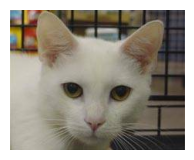

(182, 227, 3)


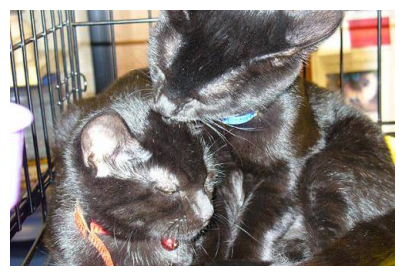

(333, 500, 3)


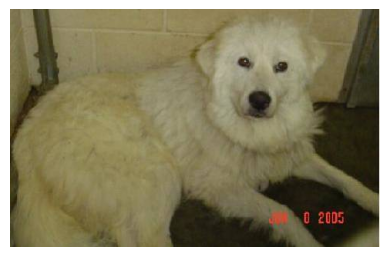

(309, 480, 3)


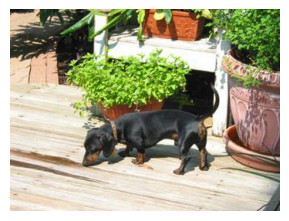

(262, 350, 3)


In [ ]:
# Print some sample images

# pathlib.Path: paths
# Path.glob: glob the given relative pattern in the directory represented by this path, yielding all matching files (of any kind)
cats = list(pathlib.Path(new_cats_dir).glob("*"))
dogs = list(pathlib.Path(new_dogs_dir).glob("*"))

# Print sample cat images
# tf.keras.preprocessing.image.load_img: load an image into PIL format
# random.randint(a, b): return a random integer N such that a <= N <= b
for i in range(2):
  img = tf.keras.preprocessing.image.load_img(cats[random.randint(0,len(cats)-1)]) # load a random cat image
  fig = plt.gcf() # create a new figure
  fig.set_size_inches(img.size[0]/100,img.size[1]/100) # set figure size
  plt.axis("off") # turn off axis lines and labels
  plt.imshow(img) # display data as an image
  plt.show() # display all open figures
  img = np.array(img) # Image to numpy array
  print(img.shape) # print image shape

# Print sample dog images
for i in range(2):
  img = tf.keras.preprocessing.image.load_img(dogs[random.randint(0,len(dogs)-1)])
  fig = plt.gcf()
  fig.set_size_inches(img.size[0]/100,img.size[1]/100)
  plt.axis("off")
  plt.imshow(img)
  plt.show()
  img = np.array(img)
  print(img.shape)

# Step 2: Preprocess Data

## Step 2.1: Resize the Images & Data Labelling

In [ ]:
# define empty lists
data = []
labels = []

# resize to target size, label cat images as 0
for i in cats:
  image=tf.keras.preprocessing.image.load_img(i, color_mode="rgb", target_size=(IMG_HEIGHT,IMG_WIDTH)) # load image
  image=np.array(image) # Image to numpy array
  data.append(image) # append image to list
  labels.append(0) # append label (0 for cat) to list

# resize to target size, label dog images as 1
for i in dogs:
  image=tf.keras.preprocessing.image.load_img(i, color_mode="rgb", target_size=(IMG_HEIGHT,IMG_WIDTH))
  image=np.array(image)
  data.append(image)
  labels.append(1)

data = np.array(data) # list to numpy array
labels = np.array(labels) # list to numpy array

## Step 2.2: Dataset Split

In [ ]:
# train_test_split: split arrays or matrices into random train and test subsets

# first split 80% as training set, 20% as validation set + testing set
X_train, X_test, y_train, y_test = train_test_split(data, labels, shuffle=True, test_size=0.2, stratify=labels)

# then split 20% as 10% for validation set, 10% for testing set
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, shuffle=True, test_size=0.5, stratify=y_test)

print("X_train: ",X_train.shape)
print("X_val: ",X_val.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_val: ",y_val.shape)
print("y_test: ",y_test.shape)

X_train:  (2400, 150, 150, 3)
X_val:  (300, 150, 150, 3)
X_test:  (300, 150, 150, 3)
y_train:  (2400,)
y_val:  (300,)
y_test:  (300,)


## Step 2.3: Rescale the Pixel Values & Data Augmentation

In [ ]:
# ImageDataGenerator: generate batches of tensor image data with real-time data augmentation

# rescale and augment the training data
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=45,
    zoom_range=[0.2,1.8],
    horizontal_flip=True)

# rescale and augment the validation data
validation_image_generator = ImageDataGenerator(rescale=1./255)

# rescale and augment the testing data
test_image_generator = ImageDataGenerator(rescale=1./255)

## Step 2.4: Generate Batches

In [ ]:
# ImageDataGenerator.flow: takes data & label arrays, generates batches of augmented data
train_generator = train_image_generator.flow(X_train, y_train, batch_size=BATCH_SIZE)
validation_generator = validation_image_generator.flow(X_val, y_val, batch_size=1)
test_generator = test_image_generator.flow(X_test, y_test, batch_size=1)

# Step 3: Build Model

In [ ]:
# input, image shape (batch size,IMG_HEIGHT,IMG_WIDTH,3)
img_input = tf.keras.layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3))


# convolutional layer, 16 filters, filter size (3,3)
# activation function, ReLU
x = tf.keras.layers.Conv2D(16, 3, activation="relu")(img_input)

# pooling layer, max pooling, window size over which to take the maximum is (2,2)
x = tf.keras.layers.MaxPooling2D(2)(x)


# convolutional layer, 32 filters, filter size (3,3)
# activation function, ReLU
x = tf.keras.layers.Conv2D(32, 3, activation="relu")(x)

# pooling layer, max pooling, window size over which to take the maximum is (2,2)
x = tf.keras.layers.MaxPooling2D(2)(x)


# convolutional layer, 64 filters, filter size (3,3)
# activation function, ReLU
x = tf.keras.layers.Conv2D(64, 3, activation="relu")(x)

# pooling layer, max pooling, window size over which to take the maximum is (2,2)
x = tf.keras.layers.MaxPooling2D(2)(x)


# flatten layer
x = tf.keras.layers.Flatten()(x)
# fully-connected layer, 512 neurons
# activation function, ReLU
x = tf.keras.layers.Dense(512, activation="relu")(x)
# fully-connected layer, 1 neuron
# activation function, sigmoid, class score (probability)
output = tf.keras.layers.Dense(1, activation="sigmoid")(x)

model = tf.keras.Model(img_input, output) # groups layers into an object
model.summary() # print a string summary of the network


# configures the model for training
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # optimizer Adam, learning rate 0.001
              loss=tf.keras.losses.BinaryCrossentropy(), # loss function BinaryCrossentropy
              metrics=['accuracy']) # metrics accuracy

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 18496)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       9,470,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,494,561 (36.22 MB)

 Trainable params: 9,494,561 (36.22 MB)

 Non-trainable params: 0 (0.00 B)

# Step 4: Train Model

In [ ]:
# Train model
history = model.fit(
      train_generator,
      steps_per_epoch=int(np.ceil(X_train.shape[0] / float(BATCH_SIZE))), # training set size/batch size
      epochs=50, # iterations on a dataset
      validation_data=validation_generator)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


48/48 ━━━━━━━━━━━━━━━━━━━━ 20s 248ms/step - accuracy: 0.5064 - loss: 0.7733 - val_accuracy: 0.6267 - val_loss: 0.6798
Epoch 2/50


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6267 - val_loss: 0.6798
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 15s 240ms/step - accuracy: 0.5591 - loss: 0.6773 - val_accuracy: 0.6533 - val_loss: 0.6479
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6533 - val_loss: 0.6479
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 20s 235ms/step - accuracy: 0.6003 - loss: 0.6631 - val_accuracy: 0.5800 - val_loss: 0.6498
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5800 - val_loss: 0.6498
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 13s 243ms/step - accuracy: 0.6060 - loss: 0.6517 - val_accuracy: 0.6133 - val_loss: 0.6299
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6133 - val_loss: 0.6299
Epoch 9/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 13s 241ms/step - accuracy: 0.6357 - loss: 0.63

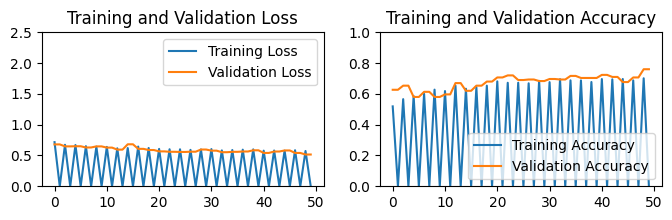

In [ ]:
# Plot figures of loss and accuracy

loss = history.history["loss"] # loss for training set
val_loss = history.history["val_loss"] # loss for validation set

acc = history.history["accuracy"] # accuracy for training set
val_acc = history.history["val_accuracy"] # accuracy for valication set

fig = plt.gcf() # create a new figure
fig.set_size_inches(8, 2) # set figure size
plt.subplot(1, 2, 1) # add subplot
plt.plot(range(len(loss)), loss, label="Training Loss") # plot loss for training set
plt.plot(range(len(val_loss)), val_loss, label="Validation Loss") # plot loss for validation set
plt.legend(loc="upper right") # location of the legend
plt.ylim(0, 2.5) # set limits of y axis
plt.title("Training and Validation Loss") # set title

plt.subplot(1, 2, 2)
plt.plot(range(len(acc)), acc, label="Training Accuracy")
plt.plot(range(len(val_acc)), val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.ylim(0, 1.0)
plt.title("Training and Validation Accuracy")
plt.show()

# Step 5: Evaluate Model

In [ ]:
# Evaluate model

print("Evaluate on test data")
results = model.evaluate(test_generator)
print("test loss, test acc:", results)

Evaluate on test data
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7511 - loss: 0.5213
test loss, test acc: [0.5108878016471863, 0.7366666793823242]


300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Dog


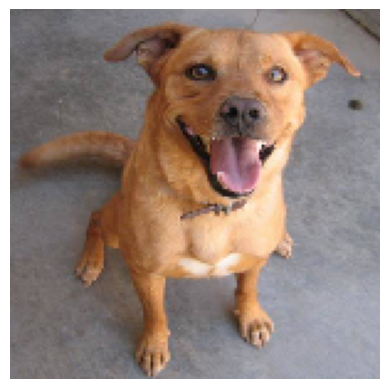

Dog


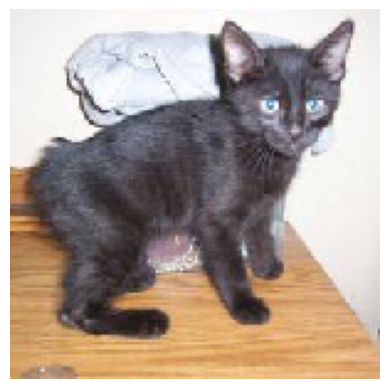

Cat


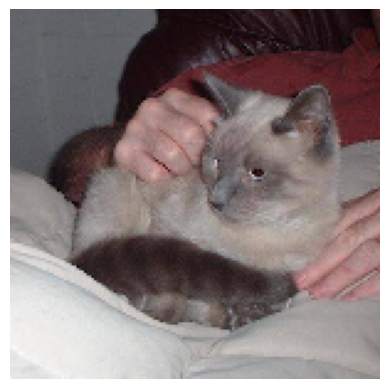

Dog


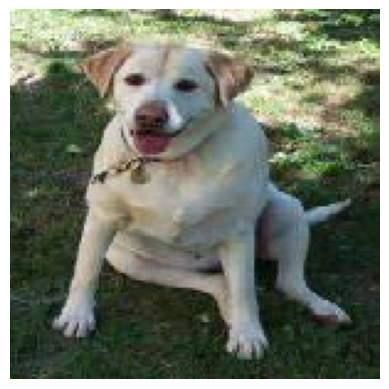

Cat


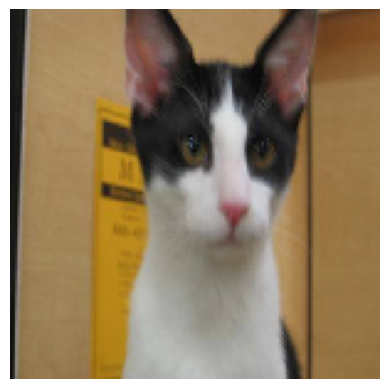

Dog


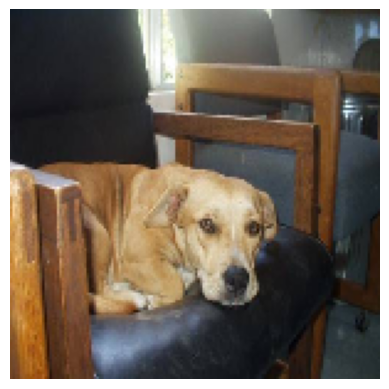

Cat


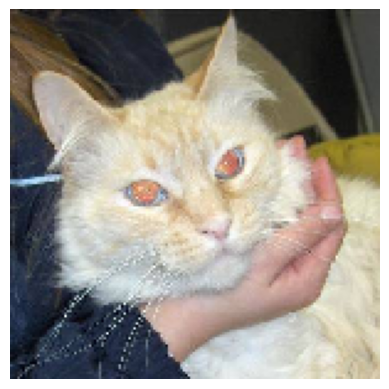

Cat


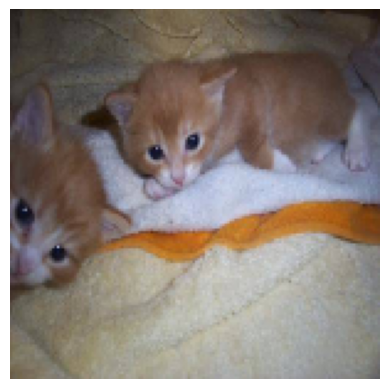

Dog


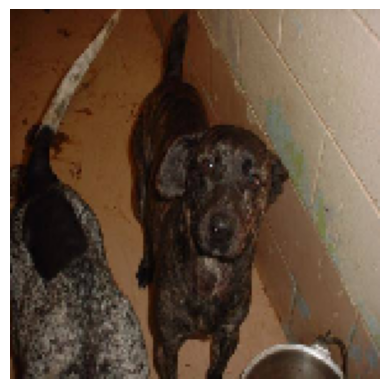

Dog


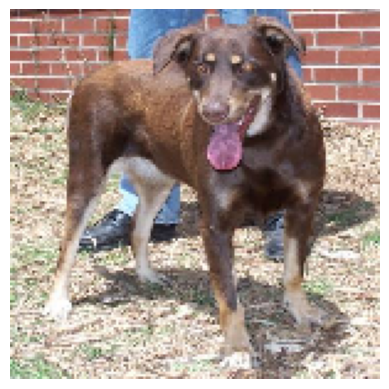

In [ ]:
# Make predictions for some random samples

class_label = {0:"Cat",1:"Dog"} # dictionary to map class to class label
X_test_rescaled = X_test / 255.0 # rescale X_test data
randomlist = random.sample(range(0,len(X_test)-1), 10) # some random samples
y_pred = np.round(model.predict(X_test,batch_size=1)) # make predictions

fig = plt.gcf() # create a new figure
for i in range(len(randomlist)):
  print(class_label[y_pred[randomlist[i]][0]]) # print class label
  plt.axis("off") # turn off axis lines and labels
  plt.imshow(X_test[randomlist[i]]) # display data as an image
  plt.show() # display all open figures